In [57]:
!pip install tensorflow==2.8

ERROR: Could not find a version that satisfies the requirement tensorflow==2.8 (from versions: 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0)
ERROR: No matching distribution found for tensorflow==2.8


In [168]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [146]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,ELU,PReLU,ReLU
from tensorflow.keras.layers import Dropout

In [147]:
df=pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [148]:
x=df.iloc[:,3:13]
y=df.iloc[:,13]
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [149]:
# geography=pd.get_dummies(x['Geography'])
geography=pd.get_dummies(x['Geography'],drop_first=True)

gender=pd.get_dummies(x['Gender'],drop_first=True)
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [150]:
x=x.drop(['Geography','Gender'],axis=1)
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [151]:
pd.concat([x,geography,gender],axis=1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [152]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [153]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [154]:
x_train.shape

(8000, 8)

In [155]:
# initialize ANN
cls=Sequential()
# Adding the i/p Layer
cls.add(Dense(units=11,activation='relu'))
# adding the first hidden layer
cls.add(Dense(units=7,activation='relu'))
# adding the second hidden layer
cls.add(Dense(units=6,activation='relu'))
# adding o/p layer
cls.add(Dense(1,activation='sigmoid'))

In [156]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [157]:
cls.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [158]:
# earlystop 
import tensorflow as tf
early=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [159]:
model=cls.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early)

Epoch 1/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.4268 - accuracy: 0.8190 - val_loss: 0.3880 - val_accuracy: 0.8398
Epoch 2/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3740 - accuracy: 0.8481 - val_loss: 0.3996 - val_accuracy: 0.8413


In [160]:
model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

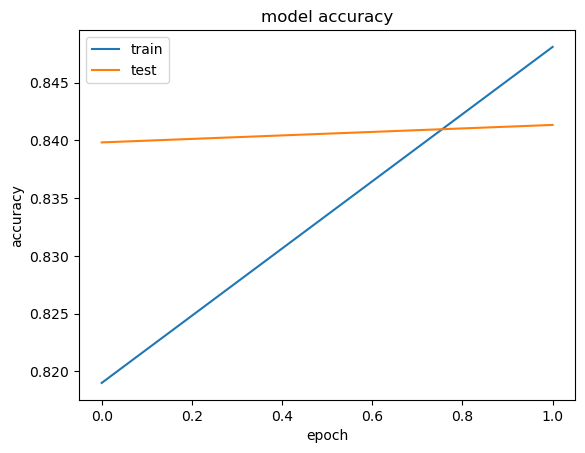

In [161]:
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('model accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()

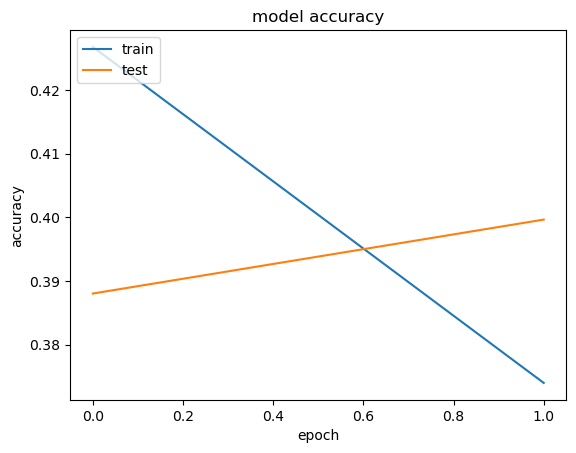

In [162]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('model accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [163]:
y_pred=cls.predict(x_test)
y_pred=(y_pred>=0.5)

63/63 [==============================] - 0s 1ms/step


In [164]:
conm=confusion_matrix(y_test,y_pred)

In [165]:
conm

array([[1560,   35],
       [ 254,  151]], dtype=int64)

In [166]:
acc=accuracy_score(y_test,y_pred)
acc

0.8555

In [167]:
cls.get_weights()[0][0][0]

-0.0038689133